# HR Analytics Project- Understanding the Attrition in HR

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading dataset
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\ibm-hr-analytics-employee-attrition-performance.zip")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


our dataset conatins 1470 rows and 35 columns

In [3]:
#checking column tittle
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

there is no null values present in our dataset and our datasset conatins 2 types of data i.e. object and int64

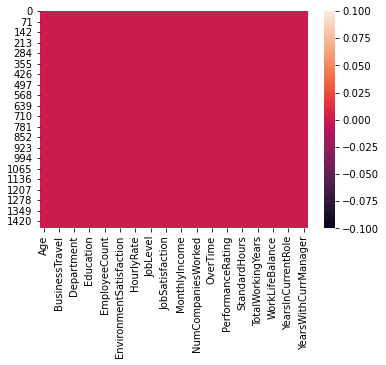

In [5]:
#Let's plot the heat map for null values

sns.heatmap(df.isnull())
plt.show()

after observing heat map of our dataset, we can clearly say that our datset has no null  values

In [6]:
#Let's check the statistic matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Observations:

1- Standard Deviation is maximum for the MonthlyRate & Monthly income, respectively.

2- Minimum and maximum age of employee is 18 and 60 years, respectively.

3- Count of all the columns confirm our above analysis
   that there are no null values

4- After observing the 75% and 100% we can say that there
   are no outliers present in the dataset

5- Employee count is 1 in all the columns so we can drop that
   colum as it is of no use for our analysis

In [7]:
#Let's drop the unnessary columns as theya are not affecting our analysis
df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],inplace=True,axis=1)

In [8]:
#now checking the new dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


now we have 31 columns in new datset, as we droped 4 columns 

In [9]:
#Let's check the correlation
df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


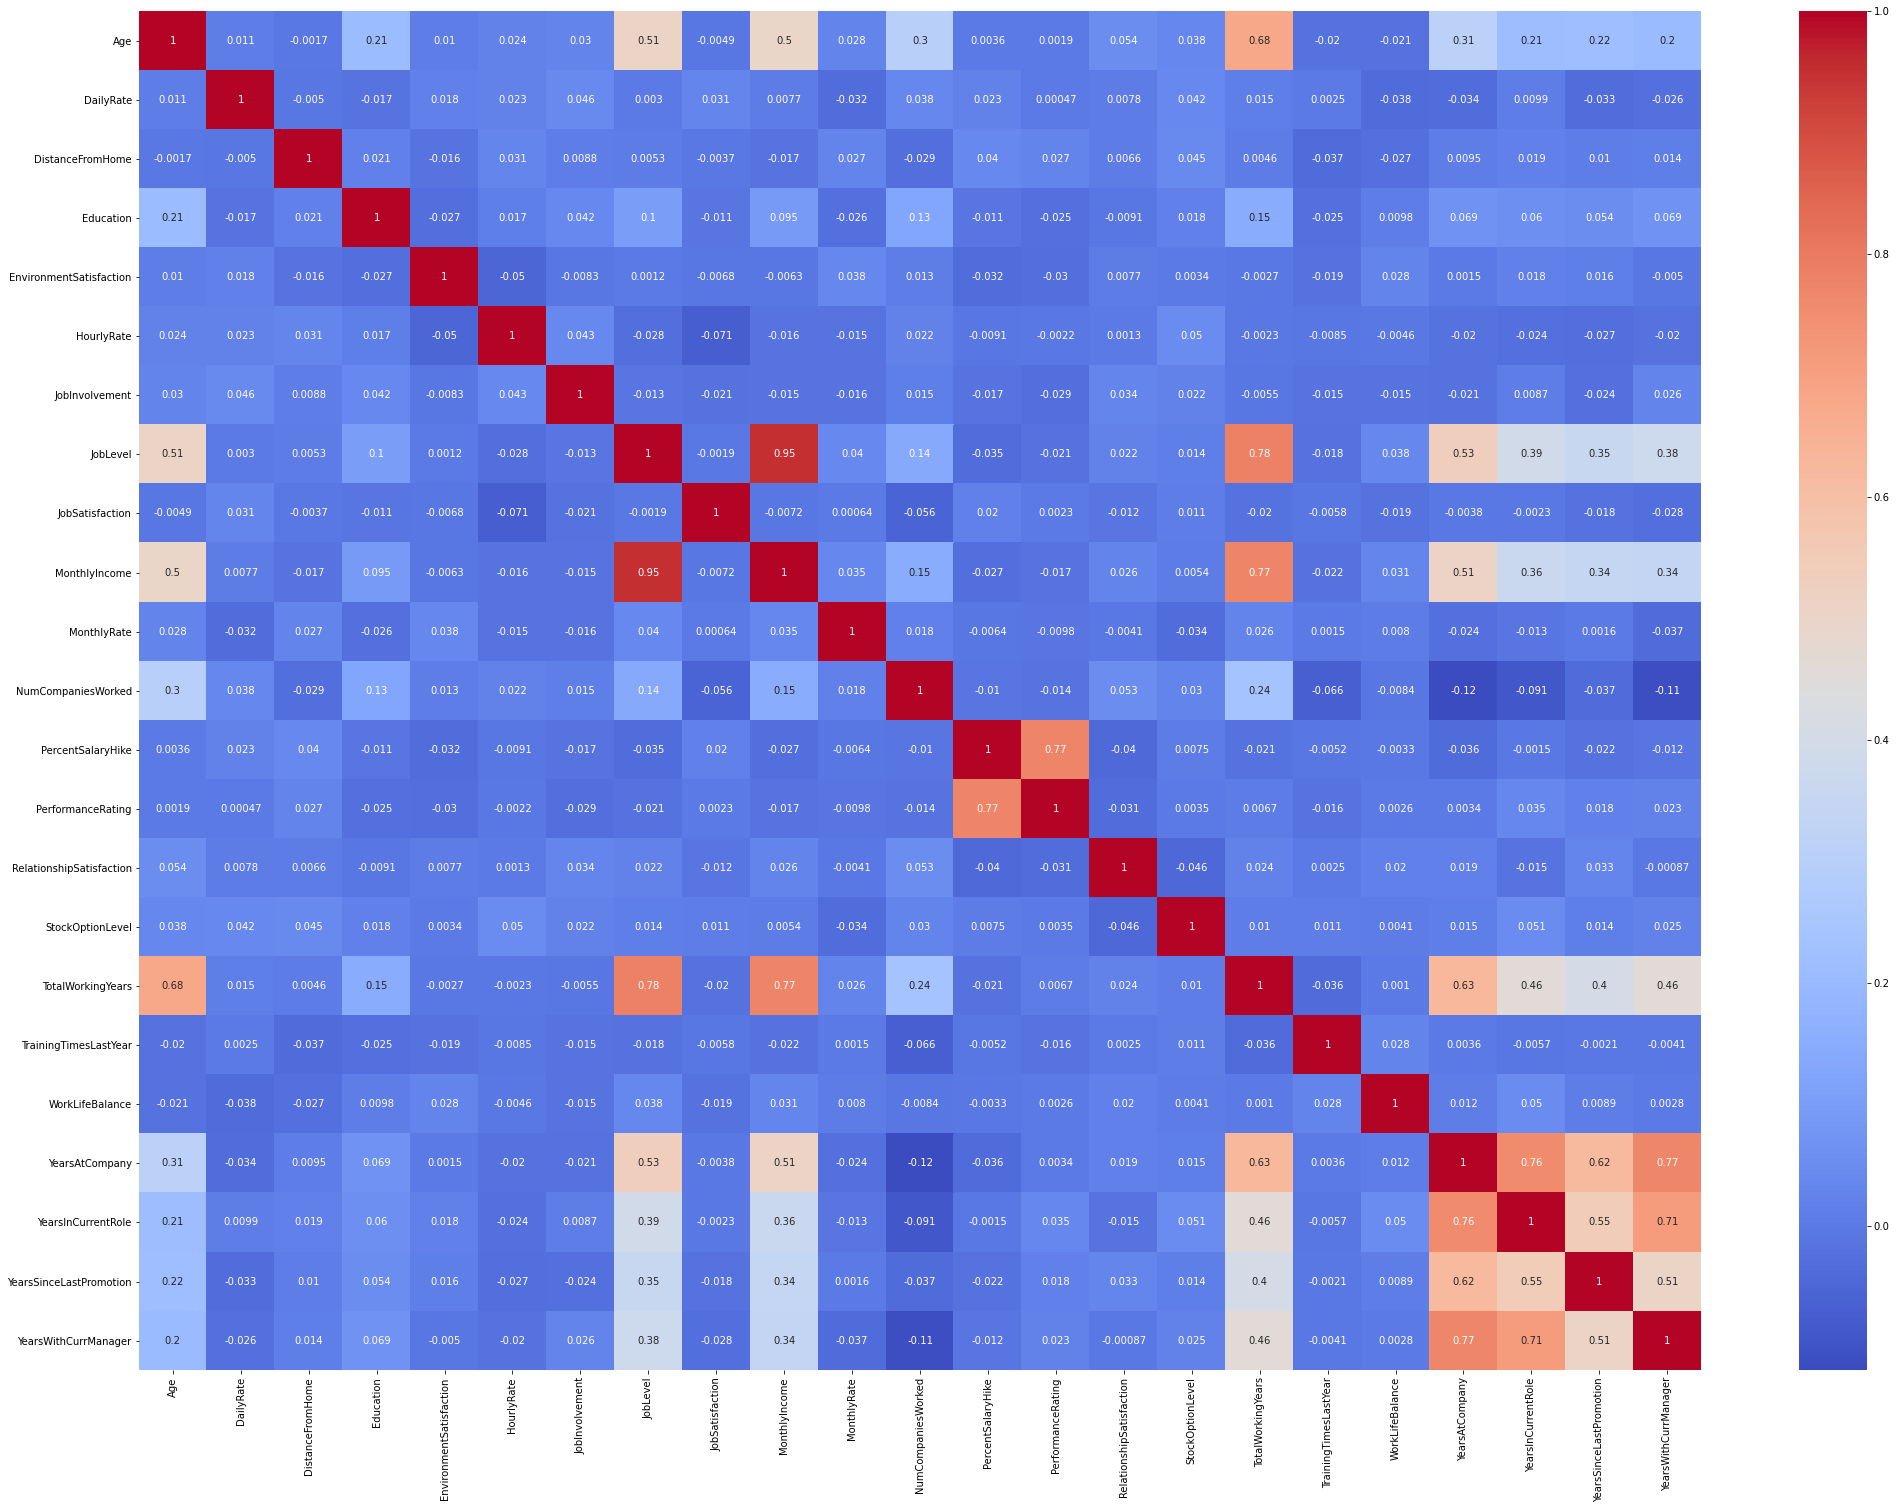

In [10]:
#Let's plot the heat map for correlation
plt.figure(figsize=(35,25))
#sns.set(font_scale=3.5)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

Observations:
    
1- Age and job level are higly corelated with each other

2- Month income is also correlated with the job level it
   means higher management is getting more salary

3- PerformanceRating is highly related to PercentSalaryHike
   which is expected.

4- Years With Current Manager is highly related to Years at
   Company

# Data Visualization

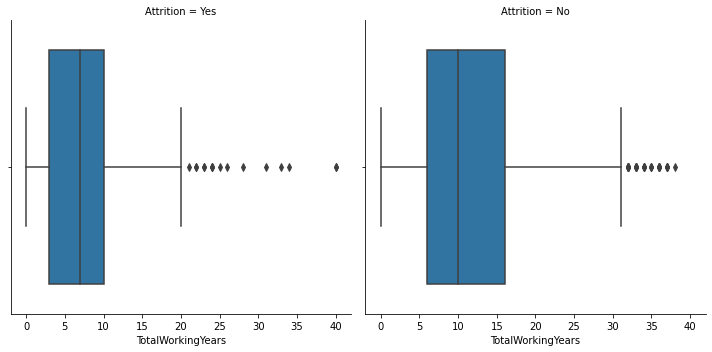

In [11]:
a = sns.FacetGrid(df, col = 'Attrition', size=5)
a.map(sns.boxplot, 'TotalWorkingYears');

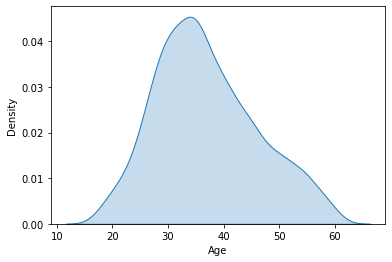

In [12]:
sns.kdeplot(df['Age'],shade=True);

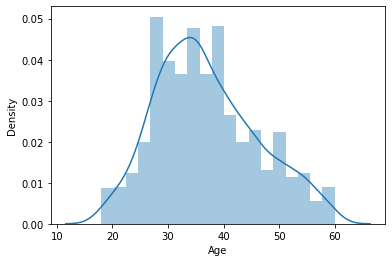

In [13]:
#Let's check the distribution of age
sns.distplot(df['Age']);

Age has a normal distribution curve. We can observe that maximum number of employes are of age 25 to 40.

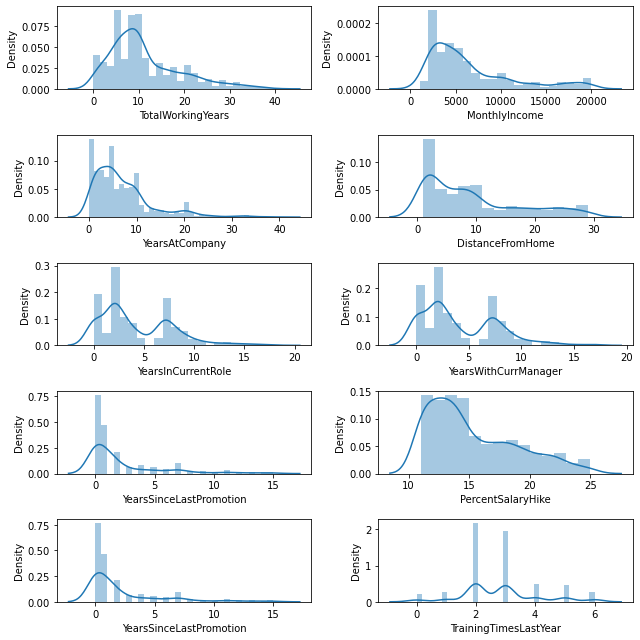

In [14]:
#Let's check the distribution
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Observations:
    
1- Almost all the graph are skewed toward right side.

2- Data are not normally distributed

In [15]:
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [16]:
#Let's define a function to plot the count values of the features
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

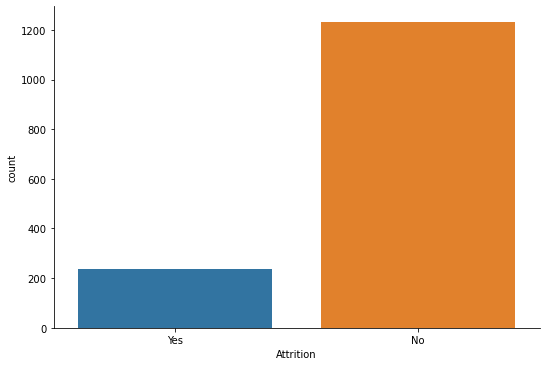

In [17]:
#Let's check the attrition
plot_cat('Attrition')

We can observe that attrition rate is very high and many employees have left the company

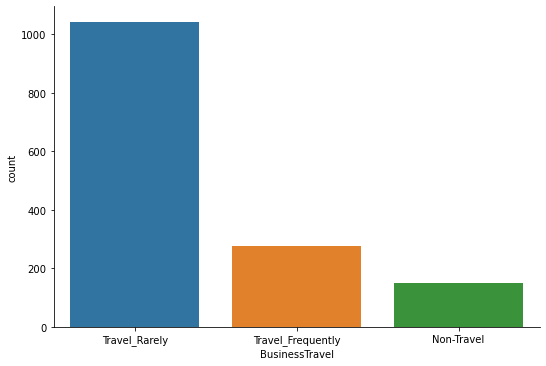

In [18]:
plot_cat('BusinessTravel')

We can observe that many of the employees work from office as the there is huge numbers of employees who work travel rarely

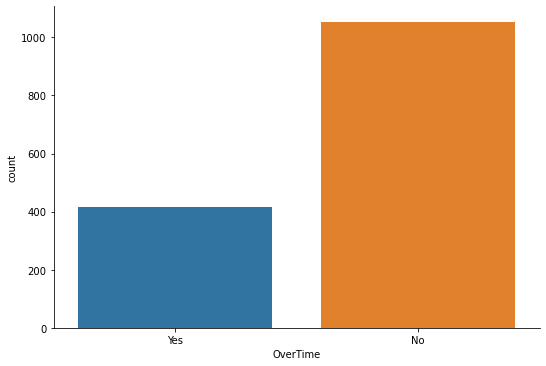

In [19]:
plot_cat('OverTime')

We can observe that very less around 400 employes only work overtime and around 1000 employes not working overtime

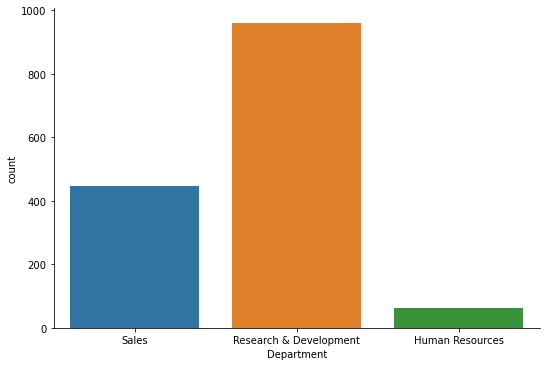

In [20]:
plot_cat('Department')

We can observe that maximum number of employeess are from R&D department, followed by sales and then HR

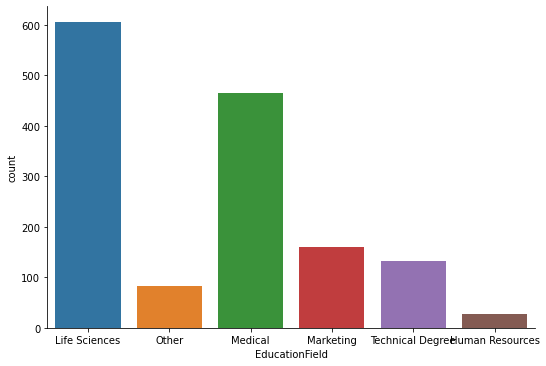

In [21]:
plot_cat('EducationField')

We can observe that maximum number of employees are from life Science field followed by Medical and Marketing Education field.

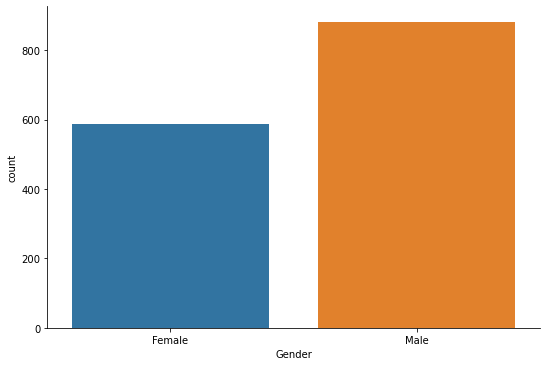

In [22]:
plot_cat('Gender')

We observe that at IBM maximum number of employees are Male above 800 compare to female arounf 600.

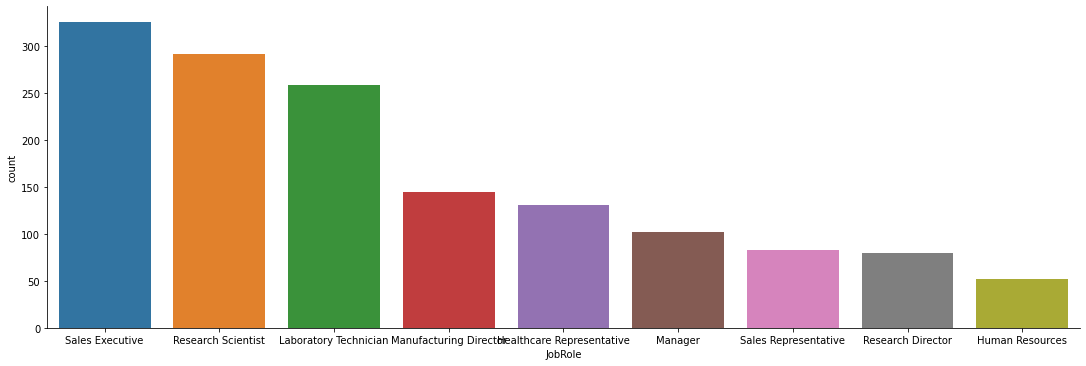

In [23]:
plot_cat('JobRole')

We can observe that maximum number of the employees are working as sales executive then followed by Reserch Scientist then Laboratory technician and so on

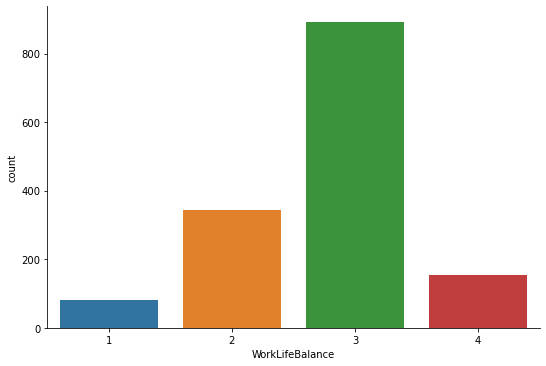

In [24]:
plot_cat('WorkLifeBalance')

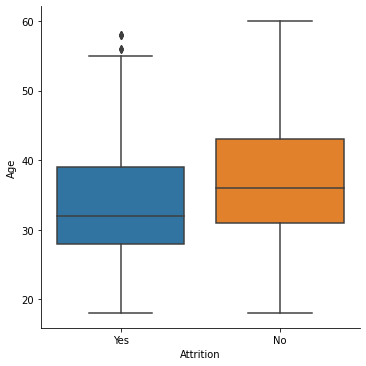

In [25]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,kind='box');

We can observe that No attrition is higher as compared to Yes category for middle age employees

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


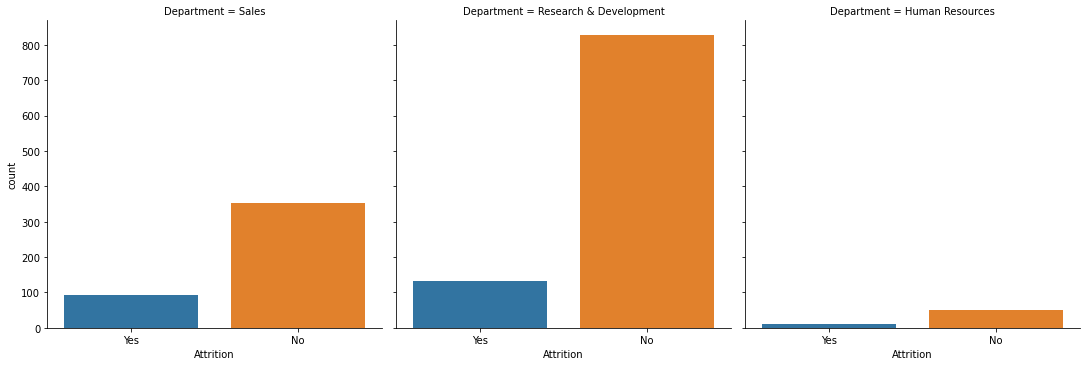

In [26]:
print(df.Department.value_counts())
sns.factorplot(data=df,kind='count',x='Attrition',col='Department');

We can clearly observe that maximum number of employees who left the company are from R&D department (961 employes) whereas in sales is 446 employes. I also implies that HR employees don't want to left thier job and thier Attrition rate is very less, only 63 employes left the job.

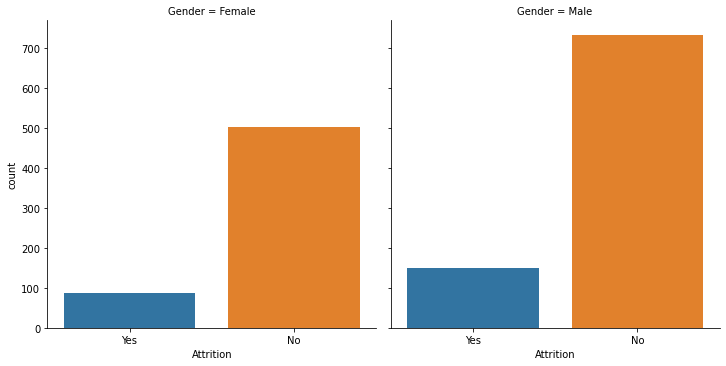

In [27]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Gender');

We can observe that the attrition rate for male employees are very higher as compared to the female employees ie around 700 and 500 respectively.

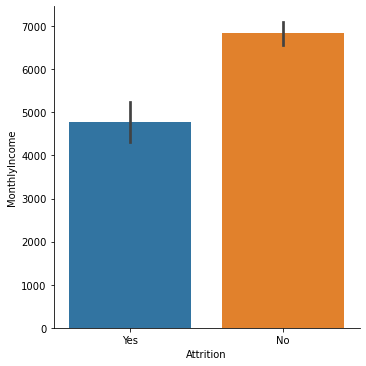

In [28]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome');

We can observe that the employees who have left the job is having mothly income higher as compared to the employees who are working still in the company

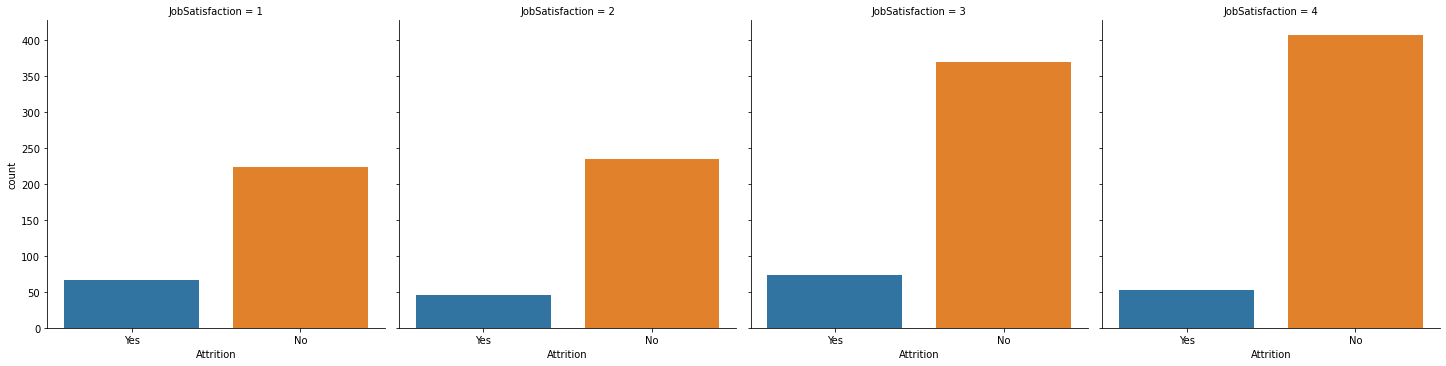

In [29]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction');

# Data Prepration

In [30]:
#Let's drop the unnessary columns which are not reqiuired for out model and analysis
df.drop(['BusinessTravel','DailyRate','HourlyRate','MonthlyRate','NumCompaniesWorked', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [31]:
#Let's encode our data using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [32]:
#Let's check the mapp values
mappings

[{0: 18,
  1: 19,
  2: 20,
  3: 21,
  4: 22,
  5: 23,
  6: 24,
  7: 25,
  8: 26,
  9: 27,
  10: 28,
  11: 29,
  12: 30,
  13: 31,
  14: 32,
  15: 33,
  16: 34,
  17: 35,
  18: 36,
  19: 37,
  20: 38,
  21: 39,
  22: 40,
  23: 41,
  24: 42,
  25: 43,
  26: 44,
  27: 45,
  28: 46,
  29: 47,
  30: 48,
  31: 49,
  32: 50,
  33: 51,
  34: 52,
  35: 53,
  36: 54,
  37: 55,
  38: 56,
  39: 57,
  40: 58,
  41: 59,
  42: 60},
 {0: 'No', 1: 'Yes'},
 {0: 'Human Resources', 1: 'Research & Development', 2: 'Sales'},
 {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 14,
  14: 15,
  15: 16,
  16: 17,
  17: 18,
  18: 19,
  19: 20,
  20: 21,
  21: 22,
  22: 23,
  23: 24,
  24: 25,
  25: 26,
  26: 27,
  27: 28,
  28: 29},
 {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 {0: 'Human Resources',
  1: 'Life Sciences',
  2: 'Marketing',
  3: 'Medical',
  4: 'Other',
  5: 'Technical Degree'},
 {0: 1, 1: 2, 2: 3, 3: 4},
 {0: 'Female', 1: 'Male'},
 {0: 1, 1: 2

In [33]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,0,1,1,1,0,2,1,...,1,0,0,0,8,0,6,4,0,5
1,31,0,1,7,0,1,2,1,1,1,...,0,12,1,3,10,2,10,7,1,7
2,19,1,1,1,1,4,3,1,1,0,...,1,4,0,1,7,2,0,0,0,0
3,15,0,1,2,3,1,3,0,2,0,...,1,0,0,2,8,2,8,7,3,0
4,9,0,1,1,0,3,0,1,2,0,...,0,1,0,3,6,2,2,2,2,2


now, we have only 24 columns left

In [34]:
#Let's check for the outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1470, 24)
(1387, 24)


In [35]:
df=df_final
print(df.shape)

(1387, 24)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1387 non-null   int64
 1   Attrition                 1387 non-null   int32
 2   Department                1387 non-null   int32
 3   DistanceFromHome          1387 non-null   int64
 4   Education                 1387 non-null   int64
 5   EducationField            1387 non-null   int32
 6   EnvironmentSatisfaction   1387 non-null   int64
 7   Gender                    1387 non-null   int32
 8   JobInvolvement            1387 non-null   int64
 9   JobLevel                  1387 non-null   int64
 10  JobRole                   1387 non-null   int32
 11  JobSatisfaction           1387 non-null   int64
 12  MaritalStatus             1387 non-null   int32
 13  MonthlyIncome             1387 non-null   int64
 14  OverTime                  1387 non-null 

# Model Prepration

In [37]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [38]:
#First let's scale our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.2f}%")

In [41]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {log.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 85.93%
Accuracy of Test Dataset: 86.69%


In [42]:
y_predict=log.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]

Confusion Matrix: 
 [[229   6]
 [ 31  12]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       235
           1       0.67      0.28      0.39        43

    accuracy                           0.87       278
   macro avg       0.77      0.63      0.66       278
weighted avg       0.85      0.87      0.84       278


Accuracy : 86.69%


In [43]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.23%
Accuracy of Test Dataset: 84.53%


In [44]:
y_predict=svm_rbf.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Confusion Matrix: 
 [[235   0]
 [ 43   0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       235
           1       0.00      0.00      0.00        43

    accuracy                           0.85       278
   macro avg       0.42      0.50      0.46       278
weighted avg       0.71      0.85      0.77       278


Accuracy : 84.53%


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(x_train, y_train)
print(f"Accuracy of Train Dataset: {tree.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 85.84%
Accuracy of Test Dataset: 82.01%


In [46]:
y_predict=tree.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]

Confusion Matrix: 
 [[216  19]
 [ 31  12]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       235
           1       0.39      0.28      0.32        43

    accuracy                           0.82       278
   macro avg       0.63      0.60      0.61       278
weighted avg       0.80      0.82      0.81       278


Accuracy : 82.01%


In [47]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {forest.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 87.41%


In [48]:
y_predict=forest.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]

Confusion Matrix: 
 [[232   3]
 [ 32  11]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       235
           1       0.79      0.26      0.39        43

    accuracy                           0.87       278
   macro avg       0.83      0.62      0.66       278
weighted avg       0.86      0.87      0.85       278


Accuracy : 87.41%


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 94.23%
Accuracy of Test Dataset: 85.97%


In [50]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0]

Confusion Matrix: 
 [[223  12]
 [ 27  16]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       235
           1       0.57      0.37      0.45        43

    accuracy                           0.86       278
   macro avg       0.73      0.66      0.69       278
weighted avg       0.84      0.86      0.85       278


Accuracy : 85.97%


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.23%
Accuracy of Test Dataset: 84.53%


In [52]:
y_predict=tree_ex.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Confusion Matrix: 
 [[235   0]
 [ 43   0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       235
           1       0.00      0.00      0.00        43

    accuracy                           0.85       278
   macro avg       0.42      0.50      0.46       278
weighted avg       0.71      0.85      0.77       278


Accuracy : 84.53%


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {knn.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 85.84%
Accuracy of Test Dataset: 82.37%


In [54]:
y_predict=knn.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

Confusion Matrix: 
 [[226   9]
 [ 40   3]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       235
           1       0.25      0.07      0.11        43

    accuracy                           0.82       278
   macro avg       0.55      0.52      0.51       278
weighted avg       0.76      0.82      0.78       278


Accuracy : 82.37%


In [55]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gnb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 76.92%
Accuracy of Test Dataset: 70.14%


In [56]:
y_predict=gnb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0]

Confusion Matrix: 
 [[171  64]
 [ 19  24]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.80       235
           1       0.27      0.56      0.37        43

    accuracy                           0.70       278
   macro avg       0.59      0.64      0.59       278
weighted avg       0.80      0.70      0.74       278


Accuracy : 70.14%


In [57]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {adb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 89.00%
Accuracy of Test Dataset: 87.77%


In [58]:
y_predict=adb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0]

Confusion Matrix: 
 [[221  14]
 [ 20  23]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       235
           1       0.62      0.53      0.57        43

    accuracy                           0.88       278
   macro avg       0.77      0.74      0.75       278
weighted avg       0.87      0.88      0.87       278


Accuracy : 87.77%


In [59]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_rbf','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(log.score(x_train,y_train)),svm_rbf.score(x_train,y_train),tree.score(x_train,y_train),forest.score(x_train,y_train),gbc.score(x_train,y_train),tree_ex.score(x_train,y_train),knn.score(x_train,y_train),gnb.score(x_train,y_train),adb.score(x_train,y_train)],
                     'Test Accuracy':[(log.score(x_test,y_test)),svm_rbf.score(x_test,y_test),tree.score(x_test,y_test),forest.score(x_test,y_test),gbc.score(x_test,y_test),tree_ex.score(x_test,y_test),knn.score(x_test,y_test),gnb.score(x_test,y_test),adb.score(x_test,y_test)]})

models.sort_values(by='Training Accuracy', ascending=True)

,Model,Training Accuracy,Test Accuracy
7,GaussianNB,0.769161,0.701439
1,SVM_rbf,0.832281,0.845324
5,Extra Trees,0.832281,0.845324
2,Decision Tree,0.858431,0.820144
6,KNeighbors,0.858431,0.823741
0,Logistics Regression,0.859333,0.866906
8,AdaBoost,0.889991,0.877698
4,Gradient Boosting,0.942290,0.859712
3,Random Forest,1.000000,0.874101


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree,
    'Support Vector Machine (rbf)': svm_rbf,
    'Random Forest':forest,
    'GradientBoostingClassifier':gbc,
    'ExtraTreesClassifier':tree_ex,
    'GaussianNB':gnb,
    'AdaBoostClassifier':adb    
    
}

regression_models = {
    'LogisticRegression': log
}

KNeighboursClassfier AUC: 0.5157347847600198


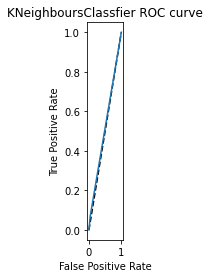

DecisionTreeClassifier AUC: 0.5991093518060366


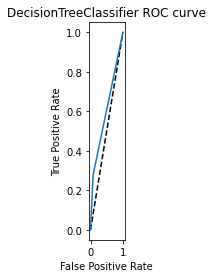

Support Vector Machine (rbf) AUC: 0.5


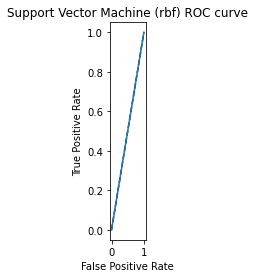

Random Forest AUC: 0.6215239980207817


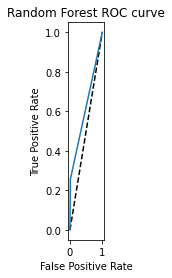

GradientBoostingClassifier AUC: 0.6605145967342899


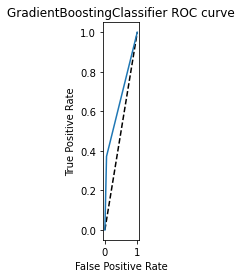

ExtraTreesClassifier AUC: 0.5


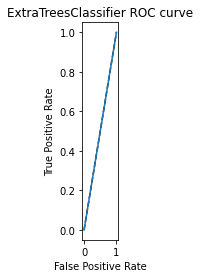

GaussianNB AUC: 0.6428995546759031


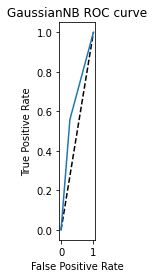

AdaBoostClassifier AUC: 0.7376546264225631


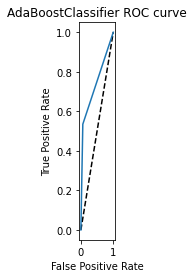

In [63]:
subplot_count = 1

for name, model in classification_models.items():
    y_pred = model.predict(x_test)
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    
    plt.subplot(1, len(classification_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)
       

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{} AUC: {}'.format(name, roc_auc_score(y_test, y_pred)))
    
    plt.show()

LogisticRegression AUC: 0.7751608114794656


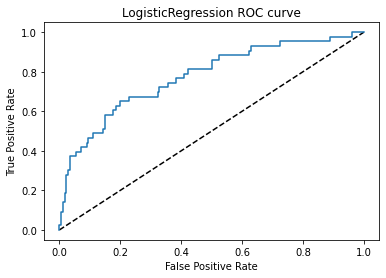

In [64]:
subplot_count = 1

for name, model in regression_models.items():
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    
    plt.subplot(1, len(regression_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{} AUC: {}'.format(name, roc_auc_score(y_test, y_pred_prob)))
    plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [66]:
for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

KNeighboursClassfier	0.8525179856115108
DecisionTreeClassifier	0.8201438848920863
Support Vector Machine (rbf)	0.8812949640287769
Random Forest	0.8633093525179856
GradientBoostingClassifier	0.8597122302158273
ExtraTreesClassifier	0.8453237410071942
GaussianNB	0.7014388489208633
AdaBoostClassifier	0.8776978417266187


In [67]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

LogisticRegression	0.8741007194244604


# We can say that Support Vector Machine (rbf) has performed the best with a score of 88.13%

In [68]:
#Let's ssave the best model
import joblib

#save the model as a pickle in a file
joblib.dump(model,'HR_Analytics.pkl')

['HR_Analytics.pkl']